# Problem statement:-
- <strong> We are given dataset of titanic in which we have to predict survival chance of passanger with the help of features given like pclass, sex, age, sibsp, parch, fare, embarked, class, who, etc... with the help of these features we have to predict survival of passenger. </strong>
- We have to detect Overfitting and Underfitting issue and comapre the differnce between logistic Regression and KNeighbor algorithm

In [1]:
# Importing libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerID,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.shape

(891, 16)

# Observation
- There are 891 rows and 16 columns in dataset.
- Each row contain information about individual person.

In [4]:
# checking null values in dataset
data.isnull().sum()

PassengerID      0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Checking null values %
data.isnull().sum()/len(data) * 100

PassengerID     0.000000
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [6]:
# fixing missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerID  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [7]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
si

SimpleImputer(strategy='median')

In [8]:
data['age'] = si.fit_transform(data[['age']])


In [9]:
data.age.isnull().sum()

0

In [10]:
data.head()

,PassengerID,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
# dropping unnecessary columns 
col_ = ['PassengerID','alive','embarked','deck']
data.drop(col_,1,inplace=True)

In [12]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,True


In [13]:
data = data.dropna()

In [14]:
num_col = data.select_dtypes(['int','float'])
cat_col = data.select_dtypes(['object','bool'])

In [15]:
num_col.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

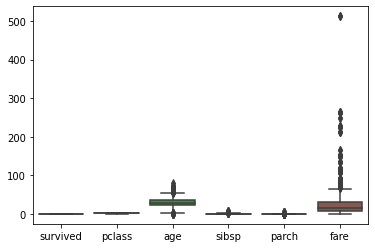

In [16]:
sns.boxplot(num_col)

In [17]:
cat_col.nunique()

sex            2
class          3
who            3
adult_male     2
embark_town    3
alone          2
dtype: int64

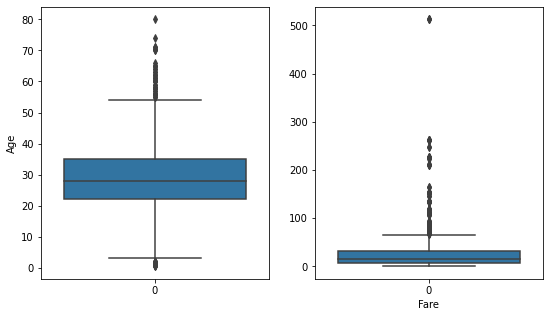

In [18]:
# checking for outliers in num_col
fig = plt.figure(figsize=(9,5))

plt.subplot(1,2,1)
sns.boxplot(num_col['age'])
plt.ylabel("Age")

plt.subplot(1,2,2)
sns.boxplot(num_col['fare'])
plt.xlabel("Fare")

plt.show()

In [19]:
def outlier_treatment(data,col_name):
    q3 = data[col_name].quantile(0.75)
    q1 = data[col_name].quantile(0.25) 
    iqr = q3-q1
    uw = q3+1.5*iqr
    lw = q1-1.5*iqr
    data[col_name] = np.where(data[col_name]>uw,data[col_name].quantile(0.85),data[col_name])
    data[col_name] = np.where(data[col_name]<lw,data[col_name].quantile(0.85),data[col_name])    

In [20]:
# Outlier treatment of age and fare column
outlier_treatment(data,'age')
outlier_treatment(data,'fare')

In [21]:
data[['age','fare']].skew()

age     0.022789
fare    0.931830
dtype: float64

# Encoding in cat_col

In [22]:
cat_col.head()

,sex,class,who,adult_male,embark_town,alone
0,male,Third,man,True,Southampton,False
1,female,First,woman,False,Cherbourg,False
2,female,Third,woman,False,Southampton,True
3,female,First,woman,False,Southampton,False
4,male,Third,man,True,Southampton,True


In [23]:
# dic1 = {'True':1,'False':0}
dic2 = {'male':1,'female':0}
dic3 = {'First':1,'Second':2,'Third':3}

In [24]:
# labeling sex,class,adult_male,alone column
data['sex'] = data['sex'].replace(dic2)
data['class'] = data['class'].replace(dic3)


In [25]:
# Ohe on who and embark_town column
embark_ohe = pd.get_dummies(data['embark_town'])
who_ohe = pd.get_dummies(data['who'])

In [26]:
embark_ohe

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [27]:
who_ohe

,child,man,woman
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
886,0,1,0
887,0,0,1
888,0,0,1
889,0,1,0


In [28]:
# concatinating embark_ohe, who_ohe
data = pd.concat([data,embark_ohe,who_ohe],1)


In [29]:
# droping embark_town and who
data.drop(['who','embark_town'],1,inplace=True)

In [30]:
data[['adult_male','alone']] = data[['adult_male','alone']].astype('int')

In [31]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,alone,Cherbourg,Queenstown,Southampton,child,man,woman
0,0,3,1,22.0,1,0,7.25000,3,1,0,0,0,1,0,1,0
1,1,1,0,38.0,1,0,56.37664,1,0,0,1,0,0,0,0,1
2,1,3,0,26.0,0,0,7.92500,3,0,1,0,0,1,0,0,1
3,1,1,0,35.0,1,0,53.10000,1,0,0,0,0,1,0,0,1
4,0,3,1,35.0,0,0,8.05000,3,1,1,0,0,1,0,1,0


In [32]:
data[['age','fare']].describe()

,age,fare
count,889.000000,889.000000
mean,29.490439,22.766094
std,10.410016,18.084628
min,3.000000,0.000000
25%,23.500000,7.895800
50%,28.000000,14.454200
75%,36.000000,31.000000
max,54.000000,65.000000


# Feature scaling 

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [34]:
data[['age','fare']] = ss.fit_transform(data[['age','fare']])

In [35]:
data[['age','fare']]

,age,fare
0,-0.719947,-0.858454
1,0.817900,1.859561
2,-0.335485,-0.821109
3,0.529554,1.678275
4,0.529554,-0.814193
...,...,...
886,-0.239370,-0.540326
887,-1.008293,0.400228
888,-0.143254,0.037838
889,-0.335485,0.400228


### Preprocessing and cleaning of dataset is done 

# Seperating data into x and y


In [36]:
x = data.drop('survived',1)
y = data['survived']

# Spliting x and y into train and test set

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

# Applying Machine learning algorithms

### KNeighborClassifer 

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc

KNeighborsClassifier()

In [39]:
knc.fit(x_train,y_train)

KNeighborsClassifier()

# Predicting value on x_test

In [40]:
y_pred_knc = knc.predict(x_test)
y_pred_knc

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

# Checking accuracy 

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred_knc,y_test)

0.7827715355805244

# Confusion matrix

In [42]:
confusion_matrix(y_pred_knc,y_test)

array([[142,  33],
       [ 25,  67]], dtype=int64)

# Checking for overfitting and underfitting 

In [52]:
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred_train = knc.predict(x_train)
y_pred_train

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,

In [56]:
from sklearn.metrics import mean_squared_error
mse_train = np.sqrt(mean_squared_error(y_pred_train,y_train))
mse_train

0.3541213482133634

In [57]:
knc.fit(x_test,y_test)

KNeighborsClassifier()

In [58]:
y_pred_test = knc.predict(x_test)
y_pred_test

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [59]:
mse_test = np.sqrt(mean_squared_error(y_pred_test,y_test))
mse_test

0.3722590214168318

In [60]:
print("Mean Squared Erron on train data set : ",mse_train)
print("Mean Squared Erron on test data set : ",mse_test)

Mean Squared Erron on train data set :  0.3541213482133634
Mean Squared Erron on test data set :  0.3722590214168318


In [68]:
mse_test-mse_train

0.01813767320346843

<strong> Since the difference of error between train and test data is not to much so there is no case of overfitting and underfitting.

# Applying logistic regression 

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [44]:
lr.fit(x_train,y_train)

LogisticRegression()

# Predicting value of x_test

In [45]:
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

# Checking accuracy score

In [46]:
accuracy_score(y_pred_lr,y_test)

0.8052434456928839

# Checking for Overfitting and underfitting 

In [61]:
lr.fit(x_train,y_train)

LogisticRegression()

In [62]:
# predicting value of x_train 
y_pred_train_lr = lr.predict(x_train)
y_pred_train_lr

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [63]:
mse_train_lr = np.sqrt(mean_squared_error(y_pred_train_lr,y_train))
mse_train_lr

0.4186181524447669

In [64]:
lr.fit(x_test,y_test)

LogisticRegression()

In [65]:
# predicting value on x_test
y_pred_test_lr = lr.predict(x_test)
y_pred_test_lr

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [66]:
mse_test_lr = np.sqrt(mean_squared_error(y_pred_test_lr,y_test))
mse_test_lr

0.40594828179293563

In [67]:
print("Mean Squared Erron on train data set : ",mse_train_lr)
print("Mean Squared Erron on test data set : ",mse_test_lr)

Mean Squared Erron on train data set :  0.4186181524447669
Mean Squared Erron on test data set :  0.40594828179293563


In [69]:
mse_train_lr-mse_test_lr

0.012669870651831283

<strong> Since the difference of error between train and test data is not to much so there is no case of overfitting and underfitting.

# confusion matrix


In [47]:
confusion_matrix(y_pred_lr,y_test)

array([[141,  26],
       [ 26,  74]], dtype=int64)

# Cross validation for logistic Regression algo

In [71]:

from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=10)

array([0.79775281, 0.82022472, 0.7752809 , 0.85393258, 0.82022472,
       0.78651685, 0.82022472, 0.78651685, 0.83146067, 0.85227273])

# Observation 
- From above we can see the score of logistic Regression on different set of train and test data
- Here we can observe the minimum score is 0.7752809 and maximum score is 0.85393258

# Cross validation for KNeighborClassifier algo

In [72]:
cross_val_score(knc,x,y,cv=10)

array([0.79775281, 0.84269663, 0.74157303, 0.79775281, 0.85393258,
       0.84269663, 0.85393258, 0.7752809 , 0.84269663, 0.82954545])

# Observation 
- From above we can see score of KNeighborClassifier on different set of train and test data.
- Here we can observe that minimum score is 0.74157303 and maximum score is 0.85393258